In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/absolute_final_customer.csv")
df.head()

,user_id,gender,age,income,customer score
0,4,Male,55.0,112000,2
1,5,Male,68.0,70000,12
2,6,Female,58.0,51000,7
3,7,Female,62.0,71000,35
4,10,Female,40.0,71000,30


In [2]:
df.drop(["user_id"], axis = 1, inplace=True)

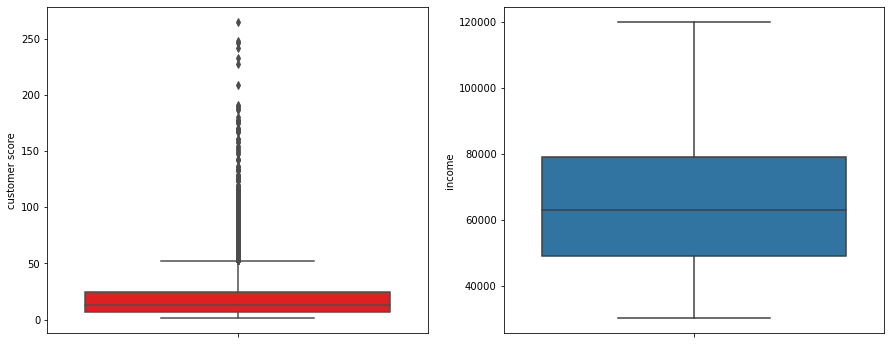

In [3]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["customer score"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["income"])
plt.show()

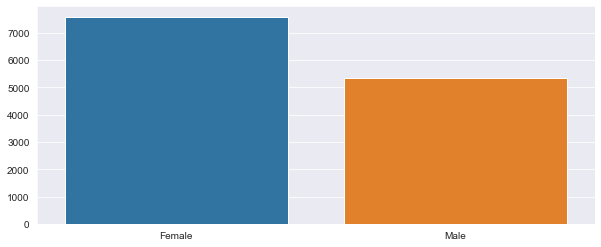

In [4]:
genders = df.gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

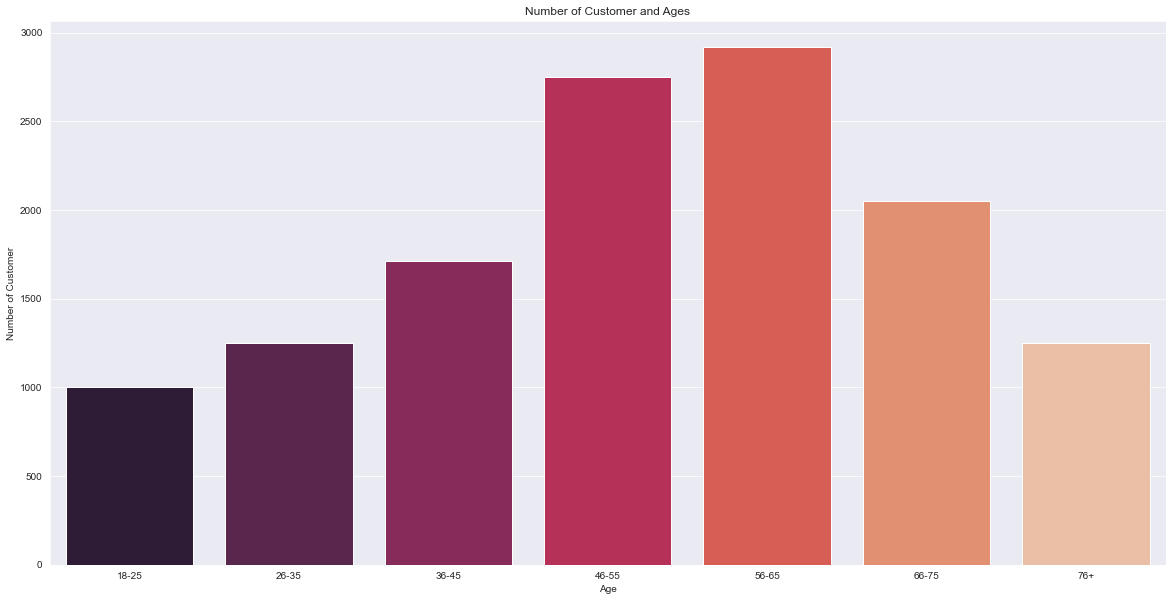

In [5]:
age18_25 = df.age[(df.age <= 25) & (df.age >= 18)]
age26_35 = df.age[(df.age <= 35) & (df.age >= 26)]
age36_45 = df.age[(df.age <= 45) & (df.age >= 36)]
age46_55 = df.age[(df.age <= 55) & (df.age >= 46)]
age56_65 = df.age[(df.age <= 65) & (df.age >= 56)]
age66_75 = df.age[(df.age <= 75) & (df.age >= 66)]
age75above = df.age[df.age >= 76]

x = ["18-25","26-35","36-45","46-55","56-65","66-75", "76+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age56_65.values),len(age66_75.values),len(age75above.values)]

plt.figure(figsize=(20,10))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

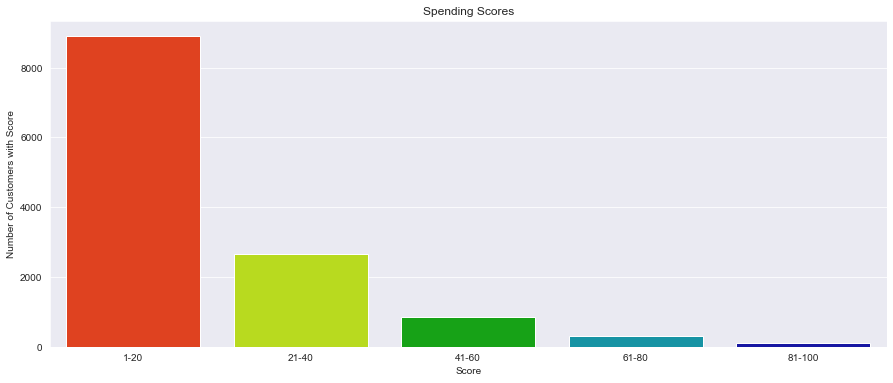

In [6]:
ss1_20 = df["customer score"][(df["customer score"] >= 1) & (df["customer score"] <= 20)]
ss21_40 = df["customer score"][(df["customer score"] >= 21) & (df["customer score"] <= 40)]
ss41_60 = df["customer score"][(df["customer score"] >= 41) & (df["customer score"] <= 60)]
ss61_80 = df["customer score"][(df["customer score"] >= 61) & (df["customer score"] <= 80)]
ss81_100 = df["customer score"][(df["customer score"] >= 81) & (df["customer score"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customers with Score")
plt.show()

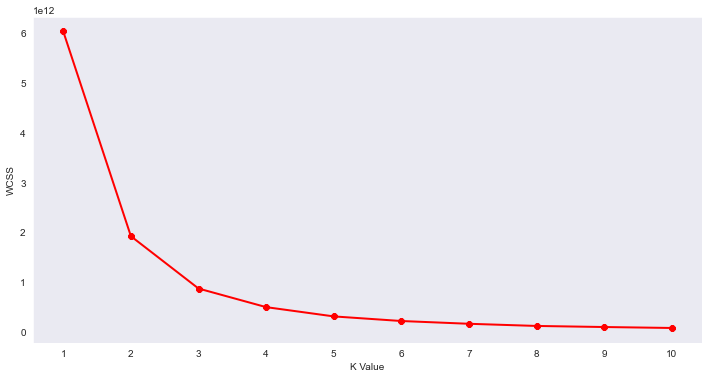

In [7]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

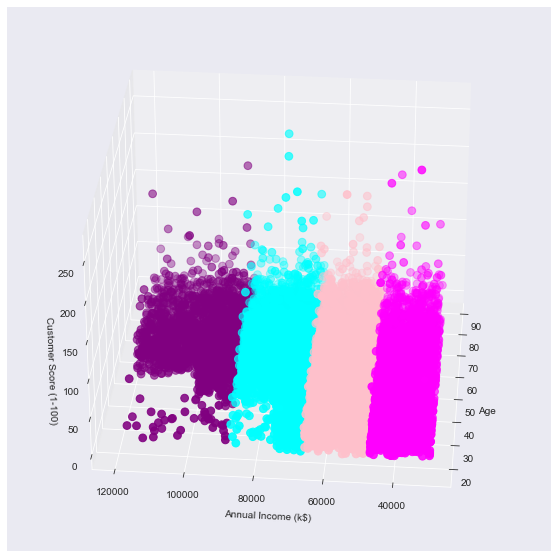

In [12]:
#code can try between 2-5 clusters

km = KMeans(n_clusters=4)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.age[df.label == 0], df["income"][df.label == 0], df["customer score"][df.label == 0], c='cyan', s=60)
ax.scatter(df.age[df.label == 1], df["income"][df.label == 1], df["customer score"][df.label == 1], c='pink', s=60)
ax.scatter(df.age[df.label == 2], df["income"][df.label == 2], df["customer score"][df.label == 2], c='magenta', s=60)
ax.scatter(df.age[df.label == 3], df["income"][df.label == 3], df["customer score"][df.label == 3], c='purple', s=60)
ax.scatter(df.age[df.label == 4], df["income"][df.label == 4], df["customer score"][df.label == 4], c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Customer Score (1-100)')
plt.show()